In [192]:
import pandas as pd
import numpy as np

import src.eda_cleaning as eda
import src.scraping as scrp

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px





# Project: Data Pipeline
## By: Nicolas Blasi
<br>

![local_picture](./images/logo.png)


## <i>Audience vs Critics: Is the audience more picky in terms of their rating vs Critics?

#### <b> In this project, we were asked to extract data from 2 different sources, creating an enriched dataset and perform EDA. I scraped an API using requests, in addition to using other packages such as Pandas, Numpy, Matplotlib, Seaborn , Difflib.

## Scraping Movie database API

- The scraping script is in the scraping.py module, in order to avoid running this script when refreshing the Notebook
- It has user defined functions tailored to the API's dataset structure
- The result is the top 100 movies of all times, following the IMBD user rating.
- DataSet is considerably clean

In [193]:
#!python "src\scraping.py"

In [194]:
imbd_table = pd.read_csv("csv\imbd_table.csv", index_col=0)
#source: https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset?resource=download
imbd_table

,imbd_rating,imbd_votecount,imbd_title,year
0,9.3,2695887,The Shawshank Redemption,1994
1,9.2,1870922,The Godfather,1972
2,9.0,2669915,The Dark Knight,2008
3,9.0,1279091,The Godfather: Part II,1974
4,9.0,796537,De 12 gezworenen,1957
...,...,...,...,...
95,8.3,159979,M - Eine Stadt sucht einen Mörder,1931
96,8.3,296955,Lawrence of Arabia,1962
97,8.3,331183,North by Northwest,1959
98,8.3,405906,Vertigo,1958


In [195]:
eda.summary_statistics(imbd_table)

,null_%,null_count,dtype,count,mean,std,min,25%,50%,75%,max
index,,,,,,,,,,,
imbd_votecount,0.0,0,int64,100.0,937051.59,605712.23,46252.0,404591.25,869990.5,1301255.5,2695887.0
year,0.0,0,int64,100.0,1987.39,22.72,1931.0,1973.50,1994.0,2003.0,2019.0
imbd_rating,0.0,0,float64,100.0,8.52,0.21,8.3,8.40,8.5,8.6,9.3
imbd_title,0.0,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Rotten tomatoes Movie csv

- The rotten tomatoes csv will enrich the overall dataset
- Its main purpose is to provide the critic's review of the movies scraped previously
- DataSet is considerably clean

In [196]:
rotten_tomatoes = pd.read_csv(r"csv\rotten_tomatoes_movies.csv")

In [197]:
rotten_tomatoes.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [198]:
#Drop columns that don't add value to my analysis
rotten_tomatoes.drop(["streaming_release_date","movie_info","critics_consensus","actors","audience_status","rotten_tomatoes_link","content_rating","tomatometer_status","audience_count","audience_rating"] ,axis=1, inplace=True)


In [199]:
eda.summary_statistics(rotten_tomatoes)

,null_%,null_count,dtype,count,mean,std,min,25%,50%,75%,max
index,,,,,,,,,,,
tomatometer_top_critics_count,0.00,0,int64,17712.0,14.59,15.15,0.0,3.0,8.0,23.0,69.0
tomatometer_fresh_critics_count,0.00,0,int64,17712.0,36.37,52.60,0.0,6.0,16.0,44.0,497.0
tomatometer_rotten_critics_count,0.00,0,int64,17712.0,20.70,30.25,0.0,3.0,8.0,24.0,303.0
runtime,0.02,314,float64,17398.0,102.21,18.70,5.0,90.0,99.0,111.0,266.0
tomatometer_rating,0.00,44,float64,17668.0,60.88,28.44,0.0,38.0,67.0,86.0,100.0
tomatometer_count,0.00,44,float64,17668.0,57.14,68.37,5.0,12.0,28.0,75.0,574.0
movie_title,0.00,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genres,0.00,19,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
directors,0.01,194,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DataFrames merge:

- Focus on enriching the API's Dataset with the rotten tomatoes csv.
- Used string matching Algorith from the Difflib library, joined on new index and year of release.
- This resulted in 74/100 rows match, reasonable for the analysis that follows.

In [200]:
eda.str_match_index(imbd_table,"imbd_title",rotten_tomatoes,"movie_title")

,imbd_rating,imbd_votecount,imbd_title,year,movie_title
0,9.3,2695887,The Shawshank Redemption,1994,The Shawshank Redemption
1,9.2,1870922,The Godfather,1972,The Godfather
2,9.0,2669915,The Dark Knight,2008,The Dark Knight
3,9.0,1279091,The Godfather: Part II,1974,"The Godfather, Part II"
4,9.0,796537,De 12 gezworenen,1957,nan
...,...,...,...,...,...
95,8.3,159979,M - Eine Stadt sucht einen Mörder,1931,nan
96,8.3,296955,Lawrence of Arabia,1962,Lawrence of Arabia
97,8.3,331183,North by Northwest,1959,North by Northwest
98,8.3,405906,Vertigo,1958,Vertigo


In [201]:
# Changing datatypes to use as index join
rotten_tomatoes["year"] = rotten_tomatoes["original_release_date"].str.slice(start=0,stop=4)
imbd_table["year"] = imbd_table["year"].astype(str)

In [202]:
# Merge
full_table = pd.merge(imbd_table,rotten_tomatoes,how="inner",on=["movie_title","year"])
full_table

,imbd_rating,imbd_votecount,imbd_title,year,movie_title,genres,directors,authors,original_release_date,runtime,production_company,tomatometer_rating,tomatometer_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,9.3,2695887,The Shawshank Redemption,1994,The Shawshank Redemption,Drama,Frank Darabont,Frank Darabont,1994-09-10,142.0,Columbia Pictures,91.0,75.0,19,68,7
1,9.2,1870922,The Godfather,1972,The Godfather,Drama,Francis Ford Coppola,"Francis Ford Coppola, Mario Puzo",1972-03-24,177.0,Paramount Pictures,98.0,99.0,24,97,2
2,9.0,2669915,The Dark Knight,2008,The Dark Knight,"Action & Adventure, Drama, Science Fiction & F...",Christopher Nolan,"Christopher Nolan, Jonathan Nolan",2008-07-18,152.0,Warner Bros. Pictures/Legendary,94.0,340.0,63,320,20
3,9.0,1279091,The Godfather: Part II,1974,"The Godfather, Part II","Drama, Mystery & Suspense",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola",1974-12-20,200.0,Paramount Pictures,98.0,83.0,17,81,2
4,9.0,1363421,Schindler's List,1993,Schindler's List,Drama,Steven Spielberg,Steven Zaillian,1993-12-15,195.0,Universal Pictures,97.0,100.0,24,97,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,8.4,82428,Idi i smotri,1985,Come and See (Idi i smotri),"Art House & International, Drama",Elem Klimov,"Ales Adamovich, Elem Klimov, Ales Adamovich",1985-10-17,142.0,Kino International,97.0,34.0,7,33,1
70,8.3,445614,Citizen Kane,1941,Citizen Kane,"Classics, Drama, Mystery & Suspense",Orson Welles,"Herman J. Mankiewicz, Orson Welles",1941-05-01,119.0,RKO Radio Pictures,100.0,93.0,23,93,0
71,8.3,296955,Lawrence of Arabia,1962,Lawrence of Arabia,"Action & Adventure, Classics, Drama",David Lean,"Robert Bolt, Michael Wilson",1962-12-16,216.0,Columbia Pictures,98.0,88.0,23,86,2
72,8.3,331183,North by Northwest,1959,North by Northwest,"Classics, Mystery & Suspense",Alfred Hitchcock,Ernest Lehman,1959-09-17,136.0,Turner Entertainment,99.0,78.0,18,77,1


In [203]:
# Change imbd_rating base to be clearly comparable with the critics rating.
full_table["imbd_rating"] = full_table["imbd_rating"]*10

## Summary statistics for the main DF

- Result after the merge: 74/100 movies.
- the user rating (imbd_rating) average is considerably lower than the critics rating (tomatometer_rating)
- max user rating is 93, vs 100 from the critics
- the critics rating shows a higher dispersion


In [204]:
eda.summary_statistics(full_table)

,null_%,null_count,dtype,count,mean,std,min,25%,50%,75%,max
index,,,,,,,,,,,
imbd_votecount,0.0,0,int64,74.0,1069850.62,612404.23,46252.0,548073.50,1052229.0,1370372.75,2695887.0
tomatometer_top_critics_count,0.0,0,int64,74.0,33.35,17.39,3.0,21.25,28.0,48.75,67.0
tomatometer_fresh_critics_count,0.0,0,int64,74.0,149.09,110.45,13.0,75.25,97.0,225.00,495.0
tomatometer_rotten_critics_count,0.0,0,int64,74.0,16.66,26.43,0.0,2.00,8.0,19.00,182.0
imbd_rating,0.0,0,float64,74.0,85.35,2.25,83.0,84.00,85.0,86.00,93.0
runtime,0.0,0,float64,74.0,136.76,29.76,80.0,116.25,136.0,153.00,216.0
tomatometer_rating,0.0,0,float64,74.0,91.72,7.61,68.0,88.25,94.0,97.00,100.0
tomatometer_count,0.0,0,float64,74.0,165.72,126.50,13.0,81.25,101.5,243.50,574.0
imbd_title,0.0,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Audience vs Critics: Is the audience more picky in terms of their rating vs Critics?

- the distribution of the audience rating (IMBD) vs the critic's rating (tomatometer) clearly show a different skew.
    - audience rating has a right skew (more concentration on the lower values) vs a left skew on the critics case.
- There seems to be a positive correlation between votecount and rating for the audience.
- The dispersion and mean values analyzed in the sumarry statistics are corroborated graphically.

### This sample shows evidence that the audience might be more picky with their rating than critics, when evaluating all-time blockbusters.


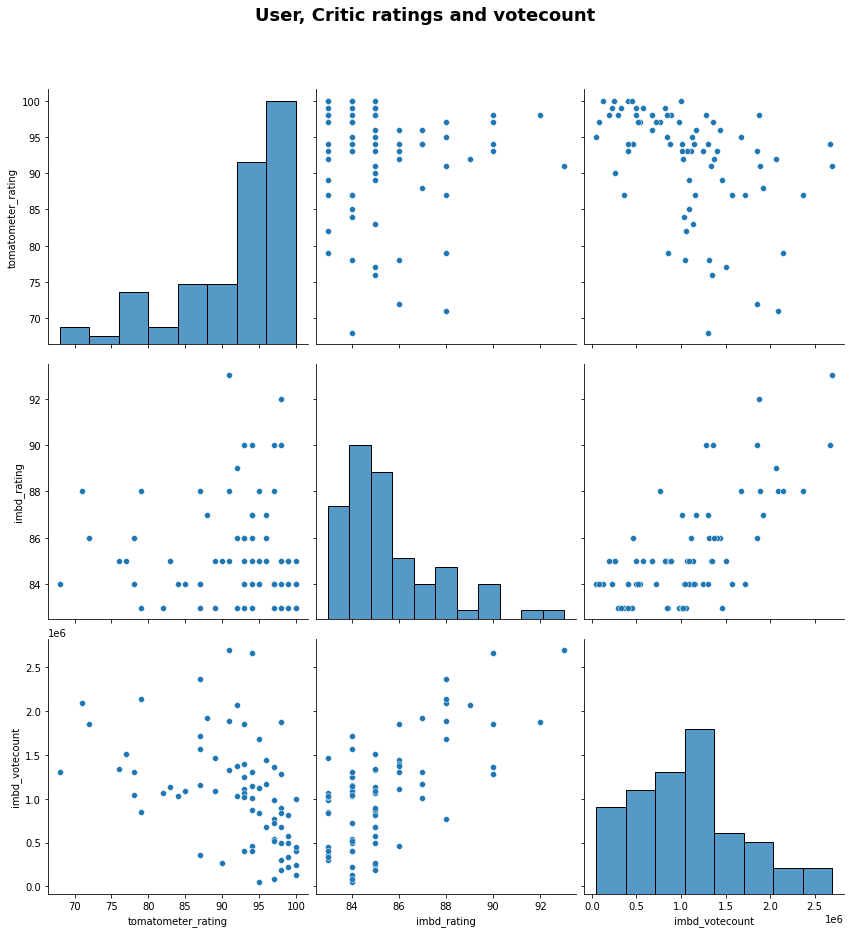

In [205]:
g = sns.pairplot(data = full_table, vars=['tomatometer_rating','imbd_rating','imbd_votecount'], height=4)
g.fig.suptitle("User, Critic ratings and votecount", size=18, weight='bold',y=1.08)
plt.savefig('images/2.jpeg')
plt.show()

In [206]:
#df = px.full_table.iris() # iris is a pandas DataFrame
fig = px.scatter(full_table, x="tomatometer_rating", y= "imbd_rating",  title="Top Movies: User rating (IMBD) Vs Critics rating (Tomatometer)", color = "imbd_votecount" , hover_name="imbd_title" , marginal_x="histogram", marginal_y="histogram",width=1000, height=800)
fig.update_traces(marker=dict(size=14,
                              line=dict(width=0.0001,
                                        color='white')),
                  selector=dict(mode='markers'))

fig.show()


## AUX EDA - Sublplots WIP for next Proyect

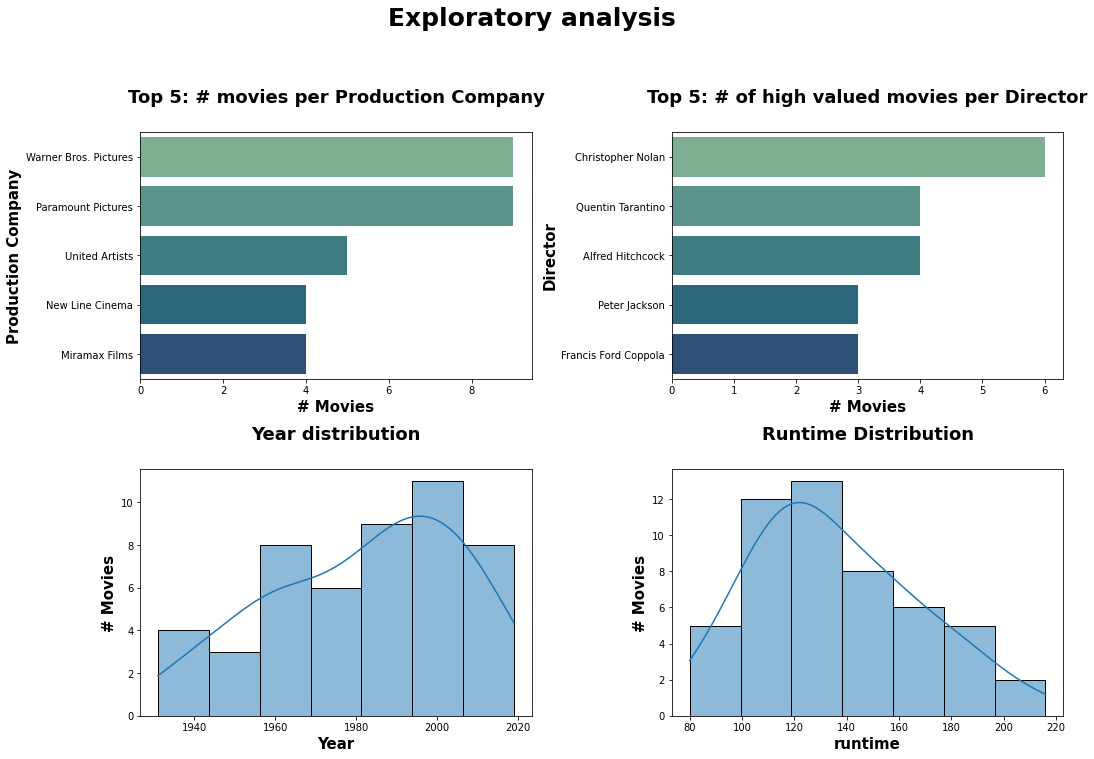

In [252]:

fig = plt.figure(figsize=(15,10))
plt.suptitle("Exploratory analysis ", size=25, weight= "bold" ,y= 1.05)

plt.subplot(2,2,1)

sns.barplot(data=full_table["production_company"].value_counts().reset_index().sort_index().head(5), x= "production_company", y= "index" , palette="crest")
plt.title("Top 5: # movies per Production Company", size=18, weight='bold', pad=30)
plt.xlabel('# Movies',size=15, weight='bold')
plt.ylabel("Production Company",size=15, weight='bold')


plt.subplot(2,2,2)
sns.barplot(data=full_table["directors"].value_counts().reset_index().sort_index().head(5), x= "directors", y= "index" , palette="crest")
plt.title("Top 5: # of high valued movies per Director", size=18, weight='bold', pad=30)
plt.xlabel('# Movies',size=15, weight='bold')
plt.ylabel("Director",size=15, weight='bold')

plt.subplot(2,2,3)
sns.histplot(data= full_table["int_year"].value_counts().reset_index(), x="index", kde=True)
plt.title("Year distribution", size=18, weight='bold', pad=30)
plt.xlabel('Year',size=15, weight='bold')
plt.ylabel("# Movies",size=15, weight='bold')


plt.subplot(2,2,4)
sns.histplot(data= full_table["runtime"].value_counts().reset_index(), x="index", kde=True)
plt.title("Runtime Distribution", size=18, weight='bold', pad=30)
plt.xlabel('runtime',size=15, weight='bold')
plt.ylabel("# Movies",size=15, weight='bold')


plt.tight_layout()
plt.show()


